In [ ]:
# deprecated depth distribution

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基本参数
datasets = ["covid", "fb", "genome", "osm", "planet"]
index_types = ["alex", "lipp"]
times = ["bulkload", "insert"]
base_dir = "../log/worst"
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# 创建一个字典存储所有数据
data = {dataset: {} for dataset in datasets}

# 读取文件
for dataset in datasets:
    for index_type in index_types:
        for time in times:
            file_path = os.path.join(base_dir, dataset, f"{index_type}_{time}_depth_distribution.log")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                data[dataset][(index_type, time)] = df

# 折线图
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(10, 5 * len(datasets)))

j = 0
for i, dataset in enumerate(datasets):
    ax = axes[i]
    for (index_type, time), df in data[dataset].items():
        marker = markers[j % len(markers)]
        j = j + 1
        ax.plot(df['depth'], df['count'], label=f"{index_type}_{time}", marker=marker)
    ax.set_title(f"{dataset} depth distribution")
    ax.set_xlabel("Depth")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

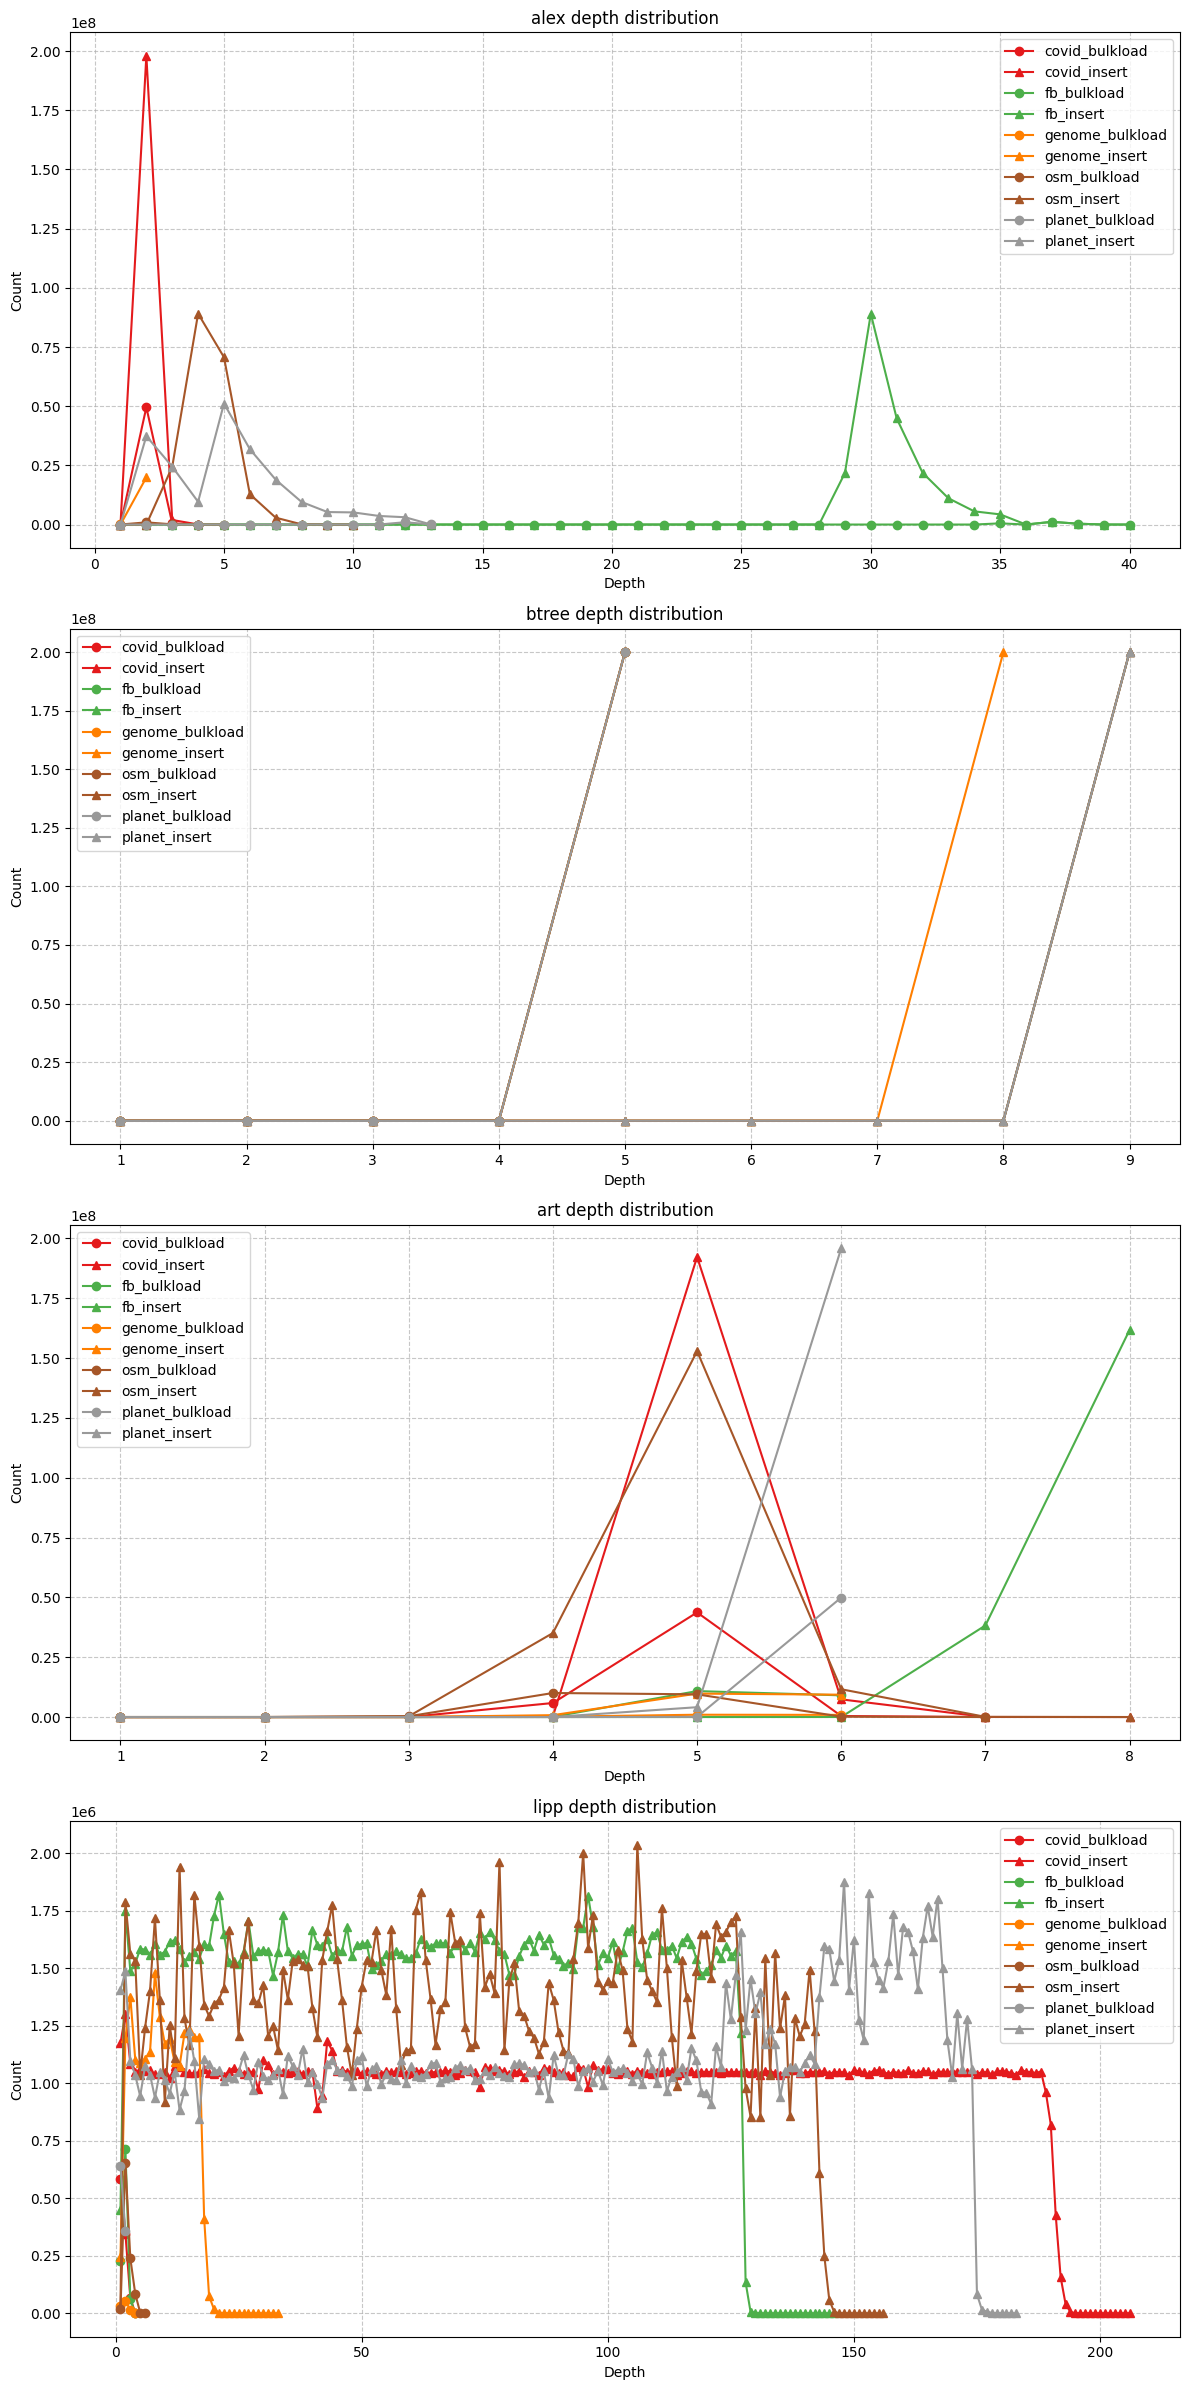

In [21]:
# depth distribution

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基本参数
datasets = ["covid", "fb", "genome", "osm", "planet"]
index_types = ["alex", "btree", "art", "lipp"]
times = ["bulkload", "insert"]
base_dir = "../log/worst"

# 为每个dataset分配一个颜色
colors = plt.cm.Set1(np.linspace(0, 1, len(datasets)))
color_dict = dict(zip(datasets, colors))

# 为每个time分配一个形状
marker_dict = {"bulkload": "o", "insert": "^"}

# 创建一个字典存储所有数据
data = {index_type: {dataset: {} for dataset in datasets} for index_type in index_types}

# 读取文件
for dataset in datasets:
    for index_type in index_types:
        for time in times:
            file_path = os.path.join(base_dir, dataset, f"{index_type}_{time}_depth_distribution.log")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                data[index_type][dataset][time] = df

# 折线图
fig, axes = plt.subplots(nrows=len(index_types), ncols=1, figsize=(12, 6 * len(index_types)))

for i, index_type in enumerate(index_types):
    ax = axes[i] if len(index_types) > 1 else axes
    
    for dataset in datasets:
        for time in times:
            if time in data[index_type][dataset]:
                df = data[index_type][dataset][time]
                color = color_dict[dataset]
                marker = marker_dict[time]
                ax.plot(df['depth'], df['count'], label=f"{dataset}_{time}", 
                        color=color, marker=marker, linestyle='-', markersize=6)
    
    ax.set_title(f"{index_type} depth distribution")
    ax.set_xlabel("Depth")
    ax.set_ylabel("Count")
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

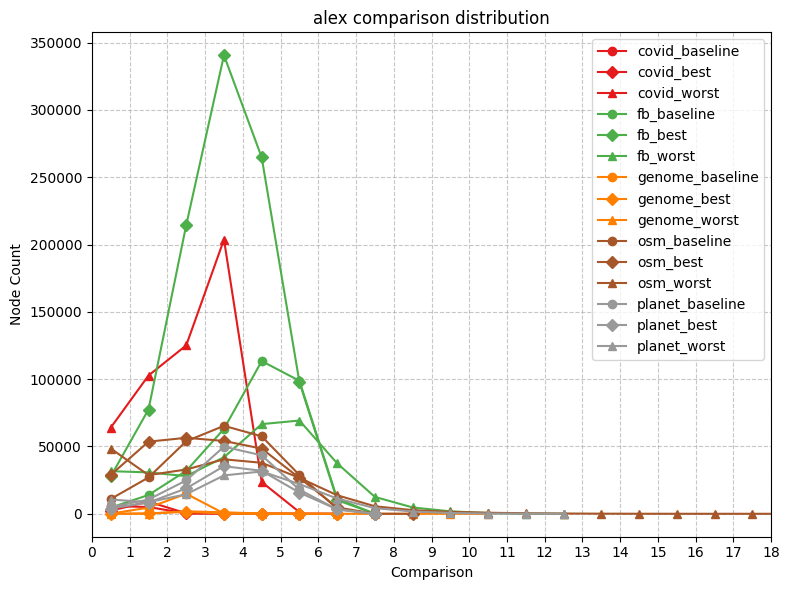

In [17]:
# alex cmp distribution

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基本参数
datasets = ["covid", "fb", "genome", "osm", "planet"]
index_types = ["alex"]
times = ["read"]
base_dirs = ["../log/baseline", "../log/best", "../log/worst"]
scenarios = ["baseline", "best", "worst"]

# 为每个dataset分配一个颜色
colors = plt.cm.Set1(np.linspace(0, 1, len(datasets)))
color_dict = dict(zip(datasets, colors))

# 为每个scenario分配一个形状
marker_dict = {"baseline": "o", "best": "D", "worst": "^"}

# 创建一个字典存储所有数据
data = {scenario: {index_type: {dataset: {} for dataset in datasets} for index_type in index_types} for scenario in scenarios}

# 读取文件
for base_dir, scenario in zip(base_dirs, scenarios):
    for dataset in datasets:
        for index_type in index_types:
            for time in times:
                file_path = os.path.join(base_dir, dataset, f"{index_type}_{time}_cmp_distribution.log")
                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)
                    df['cmp'] = df['cmp'] + 0.5
                    data[scenario][index_type][dataset][time] = df

# 折线图
fig, axes = plt.subplots(nrows=len(index_types), ncols=1, figsize=(8, 6 * len(index_types)))

for i, index_type in enumerate(index_types):
    ax = axes[i] if len(index_types) > 1 else axes
    max_cmp = 0
    for dataset in datasets:
        for scenario in scenarios:
            for time in times:
                if time in data[scenario][index_type][dataset]:
                    df = data[scenario][index_type][dataset][time]
                    color = color_dict[dataset]
                    marker = marker_dict[scenario]
                    ax.plot(df['cmp'], df['count'], label=f"{dataset}_{scenario}", 
                            color=color, marker=marker, linestyle='-', markersize=6)
                    max_cmp = max(max_cmp, df['cmp'].max())
    
    ax.set_title(f"{index_type} comparison distribution")
    ax.set_xlabel("Comparison")
    ax.set_ylabel("Node Count")
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks(range(int(max_cmp) + 1))
    ax.set_xlim(0, int(max_cmp))

plt.tight_layout()
plt.show()